## MSDS 7331 - Case Study 7 - Minimizing Monetary Loss Using a Cost Matrix
Daniel Crouthamel

Sophia Wu

Fabio Savorgnan

Bo Yun

# Introduction

We were given a data to accurately predict class 0 and class 1. The wrong prediction from class 1 cost $ 100 and wrong prediction from class 0 cost $25. So the objective is to minimize the cost due to the wrong prediction. We were given a dataset which is read above to accomplish the mentioned objective.

# Data Engineering and Analysis

The dataset has 158392 rows and 50 variables. The target is with fairly well balanced classes. As we can see the display in the histogram the data is very well distributed. The variables x24, x29, x30, x32 are categorical, please see below. Therefore, we hot encode those categorical values. Also, the variables x32 and x37 have extra character which we proceeded to remove. Finally, we have missing values in almost all the variables, but they are less than 10 % of the data, and very balance among all the variables, please see below. Because we don't have information about the variables to engineer the appropriate imputation method, and because it is very balance among all the variables, total being less than 10%, we decided to eliminate. 

In [1]:
import pandas as pd
import tensorflow as tf 
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

df = pd.read_csv('data/final_project(5).csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [2]:
df['y'].value_counts()

0    95803
1    64197
Name: y, dtype: int64

array([[<AxesSubplot:title={'center':'x0'}>,
        <AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>,
        <AxesSubplot:title={'center':'x6'}>],
       [<AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>,
        <AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>],
       [<AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>,
        <AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21

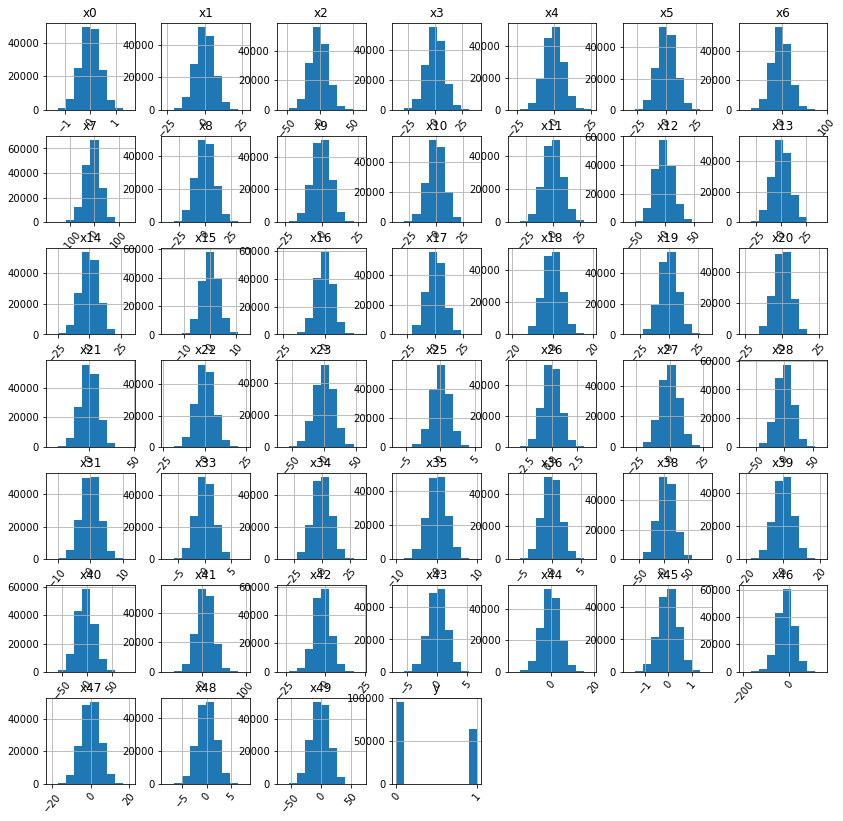

In [3]:
df.hist(figsize=(14,14), xrot=50)

In [4]:
cat_with_target = df.select_dtypes(include=['object', 'int64']).columns.tolist()
df[cat_with_target].sample(10)

,x24,x29,x30,x32,x37,y
151021,asia,Aug,tuesday,-0.01%,$-191.31,0
128614,asia,July,tuesday,-0.0%,$590.65,1
135648,euorpe,sept.,tuesday,-0.01%,$325.35,1
62713,asia,July,wednesday,-0.0%,$-495.79,0
23012,asia,Aug,wednesday,0.01%,$-333.09,0
27419,asia,July,wednesday,0.0%,$483.84,1
130270,asia,Aug,wednesday,-0.01%,$1236.78,0
147079,asia,Jun,wednesday,0.01%,$-753.91,1
82819,asia,July,thurday,-0.01%,$1375.48,1
105352,asia,July,wednesday,-0.0%,$324.44,0


In [5]:
df['x24'].value_counts()

asia       138965
euorpe      16538
america      4469
Name: x24, dtype: int64

In [6]:
df['x29'].value_counts()

July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
Dev           23
January        9
Name: x29, dtype: int64

In [7]:
df['x30'].value_counts()

wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
Name: x30, dtype: int64

## Note, going to make x32 item enum/categorical, see below

Also dropping NAs

In [8]:
df['x32'].value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [9]:
# Columns with missing data?
for i in df.columns[:]:
    print(i)
    print(df[i].isnull().sum())
    print("-------------")

x0
26
-------------
x1
25
-------------
x2
38
-------------
x3
37
-------------
x4
26
-------------
x5
37
-------------
x6
26
-------------
x7
27
-------------
x8
21
-------------
x9
30
-------------
x10
43
-------------
x11
30
-------------
x12
36
-------------
x13
31
-------------
x14
34
-------------
x15
35
-------------
x16
26
-------------
x17
27
-------------
x18
40
-------------
x19
35
-------------
x20
38
-------------
x21
29
-------------
x22
27
-------------
x23
47
-------------
x24
28
-------------
x25
22
-------------
x26
36
-------------
x27
30
-------------
x28
35
-------------
x29
30
-------------
x30
30
-------------
x31
39
-------------
x32
31
-------------
x33
41
-------------
x34
41
-------------
x35
30
-------------
x36
27
-------------
x37
23
-------------
x38
31
-------------
x39
23
-------------
x40
36
-------------
x41
40
-------------
x42
26
-------------
x43
37
-------------
x44
40
-------------
x45
29
-------------
x46
31
-------------
x47
37
-------------
x4

In [10]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

df['x24'] = df['x24'].astype('category')
df['x29'] = df['x29'].astype('category')
df['x30'] = df['x30'].astype('category')

df['x32'] = [float(x.replace('%','')) for x in df['x32']]
df['x32'] = df['x32'].astype('category')

df['x37'] = [float(x.replace('$','')) for x in df['x37']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   x0      158392 non-null  float64 
 1   x1      158392 non-null  float64 
 2   x2      158392 non-null  float64 
 3   x3      158392 non-null  float64 
 4   x4      158392 non-null  float64 
 5   x5      158392 non-null  float64 
 6   x6      158392 non-null  float64 
 7   x7      158392 non-null  float64 
 8   x8      158392 non-null  float64 
 9   x9      158392 non-null  float64 
 10  x10     158392 non-null  float64 
 11  x11     158392 non-null  float64 
 12  x12     158392 non-null  float64 
 13  x13     158392 non-null  float64 
 14  x14     158392 non-null  float64 
 15  x15     158392 non-null  float64 
 16  x16     158392 non-null  float64 
 17  x17     158392 non-null  float64 
 18  x18     158392 non-null  float64 
 19  x19     158392 non-null  float64 
 20  x20     158392 non-null  f

In [11]:
df['x32'].value_counts()

0.0      63780
0.01     40367
-0.01    33771
-0.02     9812
0.02      7911
-0.03     1709
0.03       845
-0.04      136
0.04        54
-0.05        6
0.05         1
Name: x32, dtype: int64

In [12]:
categorical_features = ['x24', 'x29', 'x30', 'x32']

cat_with_target = ['x24', 'x29', 'x30', 'x32', 'y']

numeric_features = [x for x in df.columns.values.tolist() if x not in cat_with_target]

In [13]:
dum_df = pd.get_dummies(df, columns=['x24', 'x29', 'x30', 'x32'], prefix=['x24_type', 'x29_type', 'x30_type', 'x32_type'])

dum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 78 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   x0                  158392 non-null  float64
 1   x1                  158392 non-null  float64
 2   x2                  158392 non-null  float64
 3   x3                  158392 non-null  float64
 4   x4                  158392 non-null  float64
 5   x5                  158392 non-null  float64
 6   x6                  158392 non-null  float64
 7   x7                  158392 non-null  float64
 8   x8                  158392 non-null  float64
 9   x9                  158392 non-null  float64
 10  x10                 158392 non-null  float64
 11  x11                 158392 non-null  float64
 12  x12                 158392 non-null  float64
 13  x13                 158392 non-null  float64
 14  x14                 158392 non-null  float64
 15  x15                 158392 non-nul

# Modeling Preparations

We first used H2O AutoML platform to quickly find the most optimal models given the client's time constraint. From that we found the GBM and a NN network work well and we'll explore these two models further. This is a binary classification problem with fairly well balanced classes. Our client is also only interested in minimizing the loss in an environment where only wrong predictions get penalized and are contributed to financial loss. Due to these reasons, we are going to use accuracy as our evaluation metric. The classification result from GBM here will be utilized to create a monetary outcome scenario in the next section.

In [14]:
# One-hot encoding of categorical variables
dum_df = pd.get_dummies(df, columns=['x24', 'x29', 'x30', 'x32'], prefix=['x24_type', 'x29_type', 'x30_type', 'x32_type'])

X = dum_df.loc[:, dum_df.columns != 'y']
y = dum_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=11)

model = GradientBoostingClassifier(n_estimators=145, max_depth=14, min_samples_leaf=30)

if os.path.isfile('models/gbm_cross_validate.pkl'):
    cv_results = pickle.load(open('models/gbm_cross_validate.pkl', 'rb'))
else:
    cv_results = cross_validate(model, X, y, cv=3, scoring=['accuracy','precision','recall'], n_jobs=-1, return_train_score=True)
    pickle.dump(cv_results, open('models/gbm_cross_validate.pkl', 'wb'))

pd.DataFrame(cv_results)

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,1285.813733,1.068665,0.945149,1.0,0.941307,1.0,0.920687,1.0
1,1288.113176,1.037224,0.947554,1.0,0.943965,1.0,0.924134,1.0
2,1302.184457,0.861843,0.944201,1.0,0.939422,1.0,0.920262,1.0


## Cross Validation Results

Cross validation shows evidence of overfitting the training data. Let's fit the model to our training data, and then compute the monetary cost on our test data. We want to see how the model performs on unseen data, and the what the cost per sample is.

In [15]:
if os.path.isfile('models/gbm_model.pkl'):
    model = pickle.load(open('models/gbm_model.pkl', 'rb'))
else:
    model.fit(X_train, y_train)
    pickle.dump(model, open('models/gbm_model.pkl', 'wb'))

# Model Building & Evaluation

The GBM achieved a great result of an average 94.56% accuracy and 0.00173 standard devation across its cross validation resul. The hyperparameters we used for the GBM model were those that were found with H2O AutoML. As noted above and below we find evidence that we are overfitting the training data.

n_estimators = 145
max_depth = 14
min_sample_leaf = 30


## Confusion Matrix Test

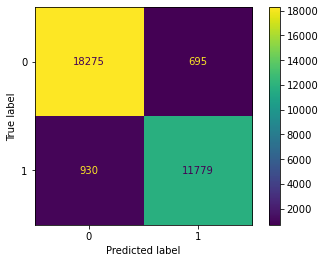

In [16]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

## Confusion Matrix Train

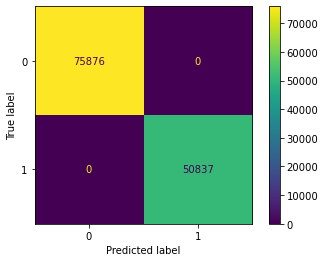

In [17]:
ConfusionMatrixDisplay.from_estimator(model, X_train, y_train)

# Monetary Outcome

What is the expected monetary cost (or loss) associated with your model and how might you best translate this to your customer?  Remember, predicting class 1 incorrectly costs the customer $100 while incorrectly predicting class 0 costs the customer $25; or said another way, False Positives = -$100 and False Negatives = -$25


- Here we used the classification result from GBM model to tie it to the monetary loss due to incorrect predictions(-$100 for false positives & -$25 for false negatives)
- The varying threshold from the graph below indicated that the __minimum loss of $74,425__ occurs at __threshold 0.84__. 
- We will communicate the importance of the optimal classification setting(threshold=0.84) to our client along with our model performance(accuracy=94.56%) and make sure to update them as we receive more data and retrain the model in the future. 
- Cost per sample is around $2.4. This cost is based on the test set, data that was not used to train the model.

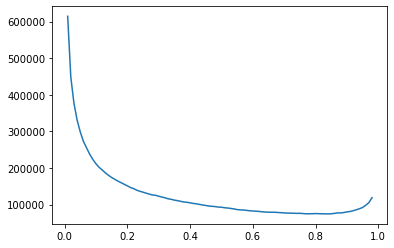

In [18]:
def compute_costs(thresholds, y_prob, y_true):
    all_costs = []

    for x in thresholds:
        cost = 0

        y_map = np.where(y_prob > x, 1, 0)

        for i in range(len(y_map)):
            
            # Cost of False Positive
            if y_map[i] - y_true[i] == 1:
                cost = cost + 100
                
            # Cose of False Negative
            elif y_map[i] - y_true[i] == -1:
                cost = cost + 25

        all_costs.append(cost)

    return all_costs

y_prob = model.predict_proba(X_test)[:,1]
thresholds = np.arange(0.01, .99, 0.01)
costs = compute_costs(thresholds, y_prob, y_test.values)

plt.plot(thresholds, costs)

## Find Min Cost, Threshold and Cost Per Sample for Test Set

Below we find the cost per sample, on unseen data, is around $2.40.

In [19]:
min_idx = np.argmin(costs)
print("Min Cost of", costs[min_idx], "occurs at threshold", thresholds[min_idx])
print("Cost per sample:", costs[min_idx] / len(y_test))

Min Cost of 74425 occurs at threshold 0.8400000000000001
Cost per sample: 2.3493481486158023


## NN Network

H2OFlow also showed that a deep learning model can perform well. Below we contruct a 3 layer nueral network having 256 nodes in each layer. Drop out layers were used to reduce overfitting. The data sets was broken up into 3 parts, train, test and validation. The validation set is used at the end for a final performance metric, along with computing the monetary cost. Min cost of 56,075 occurs at threshold 0.76 and the cost per sample is $1.77. 

In [31]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

root_logdir = os.path.join(os.curdir, "my_logs_case7")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

X = dum_df.loc[:, dum_df.columns != 'y']

y = dum_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2                                                    

final_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(77,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

final_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

tensorboard_cb = tf.keras.callbacks.TensorBoard(get_run_logdir())

safety = EarlyStopping(monitor='val_loss', patience=3, min_delta=2e-4)

final_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), 
          callbacks=[tensorboard_cb, safety], batch_size=100)

final_model.evaluate(X_val, y_val, batch_size=100)

Epoch 1/100
951/951 [==============================] - 5s 5ms/step - loss: 1.1263 - accuracy: 0.6361 - val_loss: 0.4818 - val_accuracy: 0.7712
Epoch 2/100
951/951 [==============================] - 4s 4ms/step - loss: 0.4638 - accuracy: 0.7795 - val_loss: 0.3676 - val_accuracy: 0.8429
Epoch 3/100
951/951 [==============================] - 4s 4ms/step - loss: 0.3715 - accuracy: 0.8389 - val_loss: 0.2905 - val_accuracy: 0.8804
Epoch 4/100
951/951 [==============================] - 4s 4ms/step - loss: 0.3034 - accuracy: 0.8736 - val_loss: 0.2387 - val_accuracy: 0.9055
Epoch 5/100
951/951 [==============================] - 3s 4ms/step - loss: 0.2525 - accuracy: 0.8985 - val_loss: 0.2072 - val_accuracy: 0.9187
Epoch 6/100
951/951 [==============================] - 4s 4ms/step - loss: 0.2278 - accuracy: 0.9121 - val_loss: 0.1952 - val_accuracy: 0.9238
Epoch 7/100
951/951 [==============================] - 3s 3ms/step - loss: 0.2040 - accuracy: 0.9224 - val_loss: 0.1729 - val_accuracy: 0.9352

[0.11622995883226395, 0.9625934958457947]

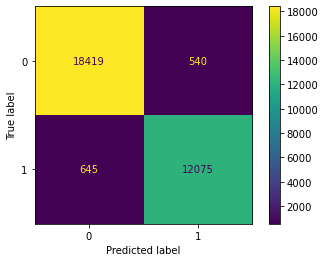

In [35]:
# With tensor flow, use predict_proba is deprecated
y_prob_val = final_model.predict(X_val)

y_pred_val = (y_prob_val > 0.5).astype('int32')

ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)

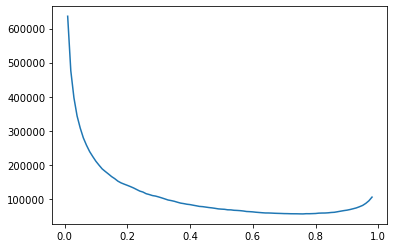

In [36]:
thresholds = np.arange(0.01, .99, 0.01)
costs = compute_costs(thresholds, y_prob_val, y_val.values)

plt.plot(thresholds, costs)

In [37]:
min_idx = np.argmin(costs)
print("Min Cost of",costs[min_idx], "occurs at threshold", thresholds[min_idx])
print("Cost per sample:", costs[min_idx] / len(y_val))

Min Cost of 56075 occurs at threshold 0.76
Cost per sample: 1.7701000662899713


# Case Conclusions

Our task was to create a model which minimizes the monetary loss associated with wrong predictions, with false positives costing $100 and false negatives costing $25. We first used H2O AutoML to find an optimal set of models to start with, which turned out to be a Gradient Boosting model and Neural Network model. Both models performed well in accuracy, but the Gradient Boosting model showed evidence of overfitting the training data. Additionally, the Gradient Boosting model took longer and had a higher cost per sample compared with the neural network model. Since model explainability is not a requirement, our recommendation is to use the neural network model.